## Setup

In [79]:
import numpy as np
import pandas as pd
import networkx as nx
import plotly.express as px
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util
import pickle

In [5]:
cash = pd.read_csv("../data/raw/cash.csv")
emt = pd.read_csv("../data/raw/emt.csv")
wire = pd.read_csv("../data/raw/wire.csv")
kyc = pd.read_csv("../data/raw/kyc.csv")

In [10]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# this is how I generated the embeddings
# don't run this on your own, it takes a while, just load the pickle as below
'''
embeddings = model.encode(emt[~(emt['emt message'].isna())]['emt message'].tolist())
embeddings_dct = {row['trxn_id'] : embeddings[index] for index, row in emt[~(emt['emt message'].isna())].reset_index().iterrows()}
with open('emt_msg_embds.pkl', 'wb') as f:
    pickle.dump(embeddings_dct, f)
'''


In [95]:
with open('emt_msg_embds.pkl', 'rb') as f:
    emt_msg_embds = pickle.load(f)

In [102]:
animal_embed = model.encode('animal')
animal_sim = {i : util.cos_sim(animal_embed, emt_msg_embds[i]).item() for i in emt_msg_embds.keys()}
emt['animalsim'] = emt['trxn_id'].map(animal_sim)

In [118]:
emt[emt['animalsim'] > 0.364].sort_values('animalsim').to_csv('tmp.csv')

In [126]:
emt

,id sender,id receiver,name sender,name receiver,emt message,emt value,trxn_id,emt message emb,animalsim
0,CUST26232205,CUST94681618,JASON GARRISON,RENEE LANG,for the bike u lent me,154.0,WFEZ76031047,NaN,0.117927
1,EXTERNAL623153,CUST59533929,GINA WISE,BRIAN HAMILTON,NaN,1170.5,RAUG63886259,NaN,NaN
2,CUST35533148,CUST23126187,ANTHONY ROBERSON,NICHOLAS DODSON,NaN,518.0,XQJS86205330,NaN,NaN
3,CUST59096559,EXTERNAL470507,KEVIN PARK,FREDERICK CARPENTER,NaN,46.0,WPXP45854083,NaN,NaN
4,CUST69049633,EXTERNAL818528,ZHU FENG LAN,ROMIL LANKA,NaN,570.0,OIRZ70883325,NaN,NaN
...,...,...,...,...,...,...,...,...,...
506446,EXTERNAL484002,CUST74979363,ALEXANDRA GRANT,WANDA HAYDEN,NaN,119.0,USHN74907347,NaN,NaN
506447,CUST12188131,CUST68693554,JASMIN SMITH,MICHAEL CRUZ,NaN,208.0,VXES44436032,NaN,NaN
506448,EXTERNAL470333,CUST90504001,NOAH BELL,MR. ERIC WALTERS,Fox racing motocross gear,150.0,LTUK21435620,NaN,0.197375
506449,EXTERNAL732393,CUST99824006,LAURENT DESBIENS,JOHN HUNT JR.,NaN,270.0,OIRO35201076,NaN,NaN


In [127]:
emt[emt['id receiver']=='CUST33059790']

,id sender,id receiver,name sender,name receiver,emt message,emt value,trxn_id,emt message emb,animalsim
11517,CUST78571575,CUST33059790,EMILY DALTON,DR.JOHN WADE,NaN,4020.5,PIYS51082004,NaN,NaN
51187,EXTERNAL838876,CUST33059790,REBECCA MOORE,DR.JOHN WADE,NaN,120.0,RUDW86394594,NaN,NaN
133415,CUST70275199,CUST33059790,VICTOR MARTINEZ,DR.JOHN WADE,NaN,4037.5,OCAA57026691,NaN,NaN
134658,CUST85769551,CUST33059790,DAVID WILKERSON,DR.JOHN WADE,"For bear skin, as dicussed",4260.0,ZGAN21196261,NaN,0.314531
201866,CUST85769551,CUST33059790,DAVID WILKERSON,DR.JOHN WADE,NaN,2754.0,WYYL62961602,NaN,NaN
249193,EXTERNAL121789,CUST33059790,OLIVIER DOUCET,DR.JOHN WADE,NaN,140.0,LFLS82951587,NaN,NaN
302564,CUST85769551,CUST33059790,DAVID WILKERSON,DR.JOHN WADE,NaN,3312.0,XQZO84186048,NaN,NaN
317881,EXTERNAL442222,CUST33059790,ZACHARIE GRENIER,DR.JOHN WADE,NaN,782.0,XJVX25977826,NaN,NaN
416636,CUST22806740,CUST33059790,JESUS JACKSON,DR.JOHN WADE,NaN,25.0,KRTM55012637,NaN,NaN
446082,CUST85769551,CUST33059790,DAVID WILKERSON,DR.JOHN WADE,bear fangs,2200.0,XGAL12621643,NaN,0.376379


In [128]:
emt[emt['id sender']=='CUST33059790']

,id sender,id receiver,name sender,name receiver,emt message,emt value,trxn_id,emt message emb,animalsim
1192,CUST33059790,CUST21069318,DR.JOHN WADE,LIU LIU,NaN,256.0,BNKT93861581,NaN,NaN
358779,CUST33059790,EXTERNAL931050,DR.JOHN WADE,JASON LEWIS,NaN,54.0,ERMS69744956,NaN,NaN
366805,CUST33059790,EXTERNAL201857,DR.JOHN WADE,CHRISTINE HARRISON,NaN,2192.0,SKEP30761191,NaN,NaN
380790,CUST33059790,CUST18002290,DR.JOHN WADE,TRACY WALLACE,NaN,600.0,RVCF62161482,NaN,NaN
436942,CUST33059790,CUST43062000,DR.JOHN WADE,SCOTT JONES,NaN,2380.5,NCFB48855701,NaN,NaN


In [172]:
def find_paths_multidigraph(start, path=[]):
    print(path)
    # Initialize the path if it's empty
    if not path:
        path = [(None, start)]  # (Edge, Current Node)
    
    if len(path) > 2:
        return path
    
    # check the emt
    if start in emt['name sender'].tolist():
        paths = []
        for _, row in emt[emt['name sender'] == start][['trxn_id', 'name receiver']].iterrows():
            next = row['name receiver']
            trxnid  = row['trxn_id']
            if (trxnid, next) not in [(p[0], p[1]) for p in path]:  # Check if edge is not in path
                newpaths = find_paths_multidigraph(next, path + [(trxnid, next)])
                paths.extend(newpaths)
    else:
        return [path]

    return paths
    # check the wires
        
    # check the cash
    '''
    paths = []
    for edge_id, next_node in graph[start]:
        if (start, edge_id) not in [(p[1], p[0]) for p in path]:  # Check if edge is not in path
            newpaths = find_paths_multidigraph(graph, next_node, path + [(edge_id, next_node)])
            paths.extend(newpaths)
    return paths
    '''

The BFS is too slow... the number of paths blows up! I had to truncate the path length to 3 just to make it stop in a reasonable time. Not sure how to traverse.

In [173]:
find_paths_multidigraph("DR.JOHN WADE")

[]
[(None, 'DR.JOHN WADE'), ('BNKT93861581', 'LIU LIU')]
[(None, 'DR.JOHN WADE'), ('BNKT93861581', 'LIU LIU'), ('DSUF61514772', 'MICHAEL ROSS')]
[(None, 'DR.JOHN WADE'), ('BNKT93861581', 'LIU LIU'), ('NQGZ91128665', 'BENJAMIN RODRIGUEZ')]
[(None, 'DR.JOHN WADE'), ('BNKT93861581', 'LIU LIU'), ('DKWE40718103', 'JENNIFER LAMBERT')]
[(None, 'DR.JOHN WADE'), ('BNKT93861581', 'LIU LIU'), ('IOSL44049052', 'DR.JEAN DESROCHERS')]
[(None, 'DR.JOHN WADE'), ('BNKT93861581', 'LIU LIU'), ('CZKU51436987', 'LI CHANG')]
[(None, 'DR.JOHN WADE'), ('BNKT93861581', 'LIU LIU'), ('IGCX50433510', 'ROBERT LACHAPELLE-PAQUETTE')]
[(None, 'DR.JOHN WADE'), ('BNKT93861581', 'LIU LIU'), ('JNCX47588964', 'AMIRA BANSAL')]
[(None, 'DR.JOHN WADE'), ('BNKT93861581', 'LIU LIU'), ('DYKT52218634', 'MICHAEL WALTERS')]
[(None, 'DR.JOHN WADE'), ('BNKT93861581', 'LIU LIU'), ('ZPAF62796929', 'ALEXIS MOREAU')]
[(None, 'DR.JOHN WADE'), ('BNKT93861581', 'LIU LIU'), ('ZNYS38561176', 'WANDA COOPER')]
[(None, 'DR.JOHN WADE'), ('BNKT93

[(None, 'DR.JOHN WADE'),
 ('BNKT93861581', 'LIU LIU'),
 ('DSUF61514772', 'MICHAEL ROSS'),
 (None, 'DR.JOHN WADE'),
 ('BNKT93861581', 'LIU LIU'),
 ('NQGZ91128665', 'BENJAMIN RODRIGUEZ'),
 (None, 'DR.JOHN WADE'),
 ('BNKT93861581', 'LIU LIU'),
 ('DKWE40718103', 'JENNIFER LAMBERT'),
 (None, 'DR.JOHN WADE'),
 ('BNKT93861581', 'LIU LIU'),
 ('IOSL44049052', 'DR.JEAN DESROCHERS'),
 (None, 'DR.JOHN WADE'),
 ('BNKT93861581', 'LIU LIU'),
 ('CZKU51436987', 'LI CHANG'),
 (None, 'DR.JOHN WADE'),
 ('BNKT93861581', 'LIU LIU'),
 ('IGCX50433510', 'ROBERT LACHAPELLE-PAQUETTE'),
 (None, 'DR.JOHN WADE'),
 ('BNKT93861581', 'LIU LIU'),
 ('JNCX47588964', 'AMIRA BANSAL'),
 (None, 'DR.JOHN WADE'),
 ('BNKT93861581', 'LIU LIU'),
 ('DYKT52218634', 'MICHAEL WALTERS'),
 (None, 'DR.JOHN WADE'),
 ('BNKT93861581', 'LIU LIU'),
 ('ZPAF62796929', 'ALEXIS MOREAU'),
 (None, 'DR.JOHN WADE'),
 ('BNKT93861581', 'LIU LIU'),
 ('ZNYS38561176', 'WANDA COOPER'),
 (None, 'DR.JOHN WADE'),
 ('BNKT93861581', 'LIU LIU'),
 ('IYTD11163401

In [178]:
G = nx.from_pandas_edgelist(emt, 'id sender', 'id receiver', create_using=nx.MultiDiGraph)

In [180]:
# takes about 3 min, be careful
communities = nx.community.louvain_communities(G)

In [191]:
[c for c in communities if len(c)<5]

[{'CUST53104501', 'EXTERNAL384816'},
 {'CUST50347072', 'EXTERNAL164505'},
 {'CUST21502567', 'EXTERNAL634576', 'EXTERNAL961580'},
 {'CUST59198851', 'CUST86204382'},
 {'CUST28790195', 'EXTERNAL392987'},
 {'CUST52744438', 'EXTERNAL754656'},
 {'CUST47846420', 'EXTERNAL453422'},
 {'CUST52596736', 'CUST64159155'},
 {'CUST95253971', 'EXTERNAL262554'},
 {'CUST42131756', 'CUST90419766', 'EXTERNAL956640'},
 {'CUST67951932', 'EXTERNAL295860'},
 {'CUST55739881', 'CUST66409442'},
 {'CUST90045968', 'EXTERNAL735877'},
 {'CUST89562675', 'EXTERNAL309260'},
 {'CUST91589391', 'CUST98277154', 'EXTERNAL458903'},
 {'CUST46138217', 'EXTERNAL723928'},
 {'CUST80858098', 'EXTERNAL663443'},
 {'CUST64726345', 'EXTERNAL151884', 'EXTERNAL989841'},
 {'CUST17685887', 'CUST61369131', 'CUST73629031', 'EXTERNAL910989'},
 {'CUST56754510', 'EXTERNAL312709'},
 {'CUST90531591', 'EXTERNAL815828'},
 {'CUST66526583', 'EXTERNAL806669'},
 {'CUST72730823', 'EXTERNAL698202'},
 {'CUST71954520', 'EXTERNAL107919'},
 {'CUST57842485', 

In [7]:
wire[wire['country sender']=='CA']['country receiver'].unique()

array(['CA', 'US', 'RU', 'UK', 'CN', 'GE', 'MX', 'AU', 'IN', 'SA'],
      dtype=object)

Countries that Canadians sent money to:
- CA (Canada)
- US (USA)
- RU (Russia)
- UK (United Kingdom)
- CN (China)
- GE (Georgia)
- MX (Mexico)
- AU (Australia)
- IN (India)
- SA (Saudi Arabia)

Of these, the transfers to China and Australia are most suspicious, according to the Fintrac doc.

In [21]:
sus_outwires = wire[wire['country receiver'].isin(['CN', 'AU'])].groupby('id sender')['trxn_id'].count().reset_index(name='count')

In [22]:
sus_outwires_foreign = wire[wire['country receiver'].isin(['CN', 'AU'])].groupby('id receiver')['trxn_id'].count().reset_index(name='count')

array([[<Axes: title={'center': 'count'}>]], dtype=object)

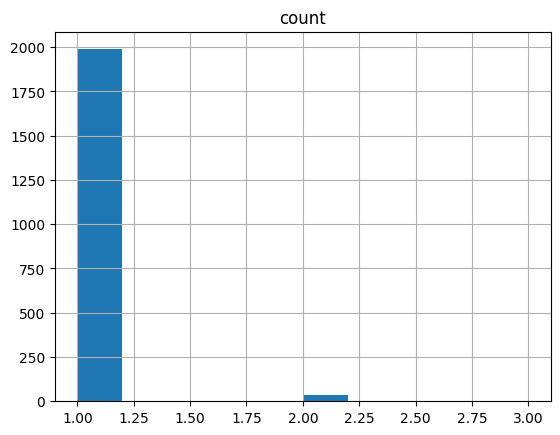

In [26]:
sus_outwires.hist()

In [29]:
sus_outwires_foreign[sus_outwires_foreign['count']>2].count()

id receiver    29
count          29
dtype: int64

array([[<Axes: title={'center': 'count'}>]], dtype=object)

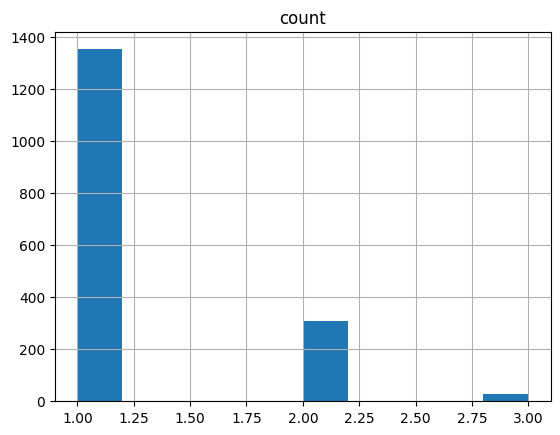

In [24]:
sus_outwires_foreign.hist()

Hmmm, not sure what 'frequent transfers' could mean here, Canadian clients only made 1-2 wires each to CN/AU (34 clients made 2 wires), and clients in CN/AU received between 1-3 wires each (338 made 2 wires, 29 made 3 wires). 

In [111]:
G = nx.from_pandas_edgelist(wire[((wire['id sender'].isin(sus_outwires[sus_outwires['count']>1]['id sender'])) | 
                                 (wire['id receiver'].isin(sus_outwires_foreign[sus_outwires_foreign['count']>2]['id receiver']))) &
                                 (wire['wire value']>10000)], 
                                 'id sender', 'id receiver', 'wire value', create_using=nx.MultiDiGraph)

In [98]:
G.number_of_edges()

91

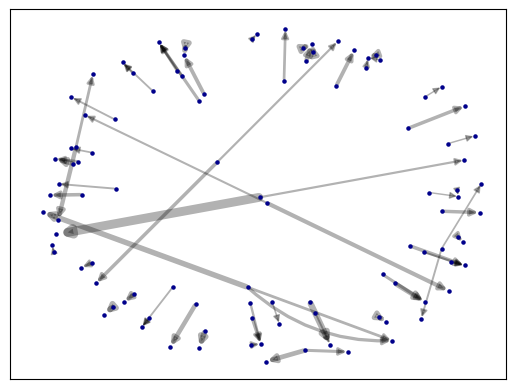

In [112]:
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=5, node_color='darkblue')

for u, v, key, data in G.edges(keys=True, data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=data['wire value']/10000, connectionstyle=f'arc3,rad={0.2*key}', edge_color='black', node_size=5, alpha=0.3)


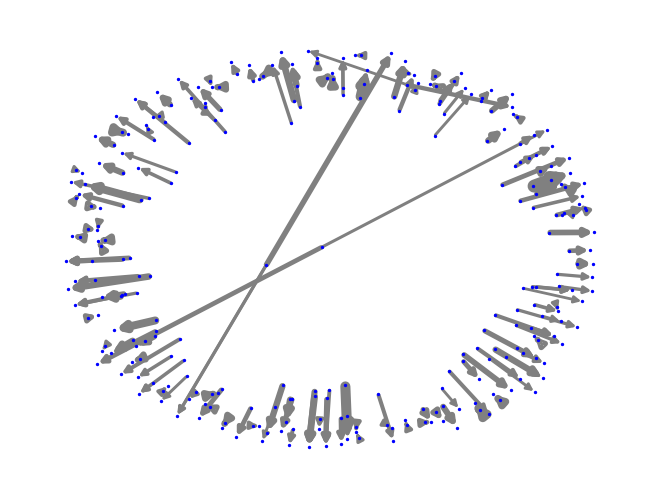

In [78]:
nx.draw(G, width=[value/10000 for value in nx.get_edge_attributes(G, 'wire value').values()], node_color='blue', node_size=2, edge_color='gray')

<Axes: >

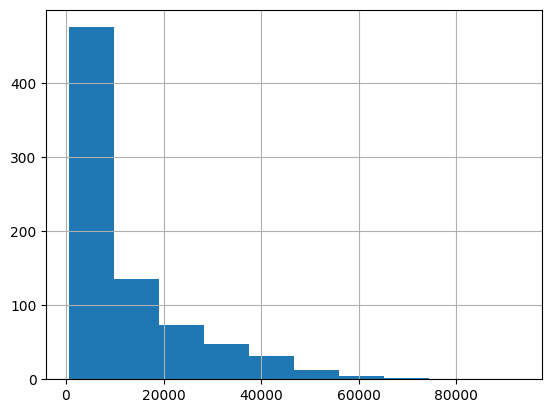

In [69]:
pd.Series([value for value in nx.get_edge_attributes(G, 'wire value').values()]).hist()